In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from __future__ import print_function

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

In [2]:
import kplr
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/dforeman/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [108]:
client = kplr.API()
star = client.star(7220674)
# star = client.star(8462852)
# star = client.star(11904151)
lcs = star.get_light_curves(short_cadence=False)
dtype = np.float32

In [109]:
x, y = [], []
for lc in lcs:
    data = lc.read()
    xx = np.ascontiguousarray(data["TIME"])
    xx = np.arange(len(xx))
    yy = np.ascontiguousarray(data["PDCSAP_FLUX"])
    q = data["SAP_QUALITY"]

    mu = np.nanmedian(yy)
    yy = (yy / mu - 1) * 1e3
    
    m = np.isfinite(yy) & np.isfinite(xx) & (q == 0)
    yy[~m] = np.interp(xx[~m], xx[m], yy[m])
    x.append(xx)
    y.append(yy)

y = np.concatenate(y)
x = np.concatenate(x)

In [110]:
y = np.ascontiguousarray(y, dtype=dtype)

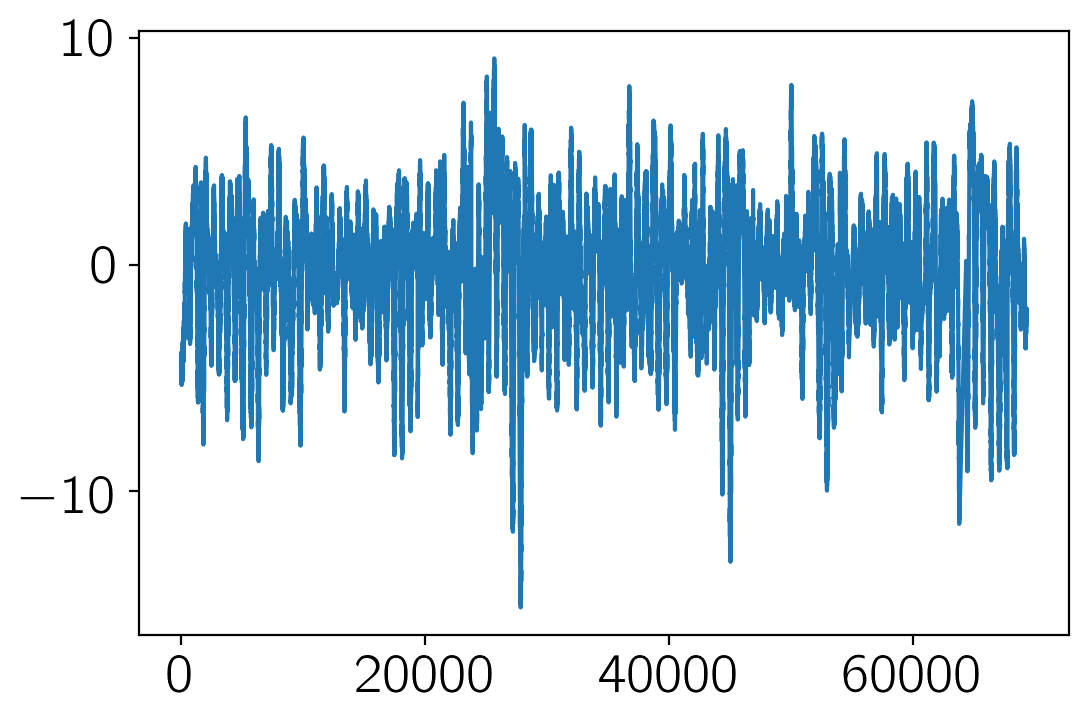

In [111]:
plt.plot(y)

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

K = 1001
yy = y[:K*(len(y)//K)].reshape((-1, K))
train_X = yy[:, :-1]
train_y = yy[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
print(train_X.shape, train_y.shape)

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

history = model.fit(train_X, train_y, epochs=1000,  verbose=2, shuffle=False)

(69, 1, 1000) (69,)
Epoch 1/1000
 - 1s - loss: 10.4568
Epoch 2/1000
 - 0s - loss: 6.4232
Epoch 3/1000
 - 0s - loss: 5.4671
Epoch 4/1000
 - 0s - loss: 4.7875
Epoch 5/1000
 - 0s - loss: 4.3755
Epoch 6/1000
 - 0s - loss: 4.0746
Epoch 7/1000
 - 0s - loss: 3.8207
Epoch 8/1000
 - 0s - loss: 3.6271
Epoch 9/1000
 - 0s - loss: 3.4373
Epoch 10/1000
 - 0s - loss: 3.2776
Epoch 11/1000
 - 0s - loss: 3.1295
Epoch 12/1000
 - 0s - loss: 2.9459
Epoch 13/1000
 - 0s - loss: 2.8564
Epoch 14/1000
 - 0s - loss: 2.7697
Epoch 15/1000
 - 0s - loss: 2.6284
Epoch 16/1000
 - 0s - loss: 2.5317
Epoch 17/1000
 - 0s - loss: 2.4035
Epoch 18/1000
 - 0s - loss: 2.3274
Epoch 19/1000
 - 0s - loss: 2.2739
Epoch 20/1000
 - 0s - loss: 2.2072
Epoch 21/1000
 - 0s - loss: 2.1512
Epoch 22/1000
 - 0s - loss: 2.0902
Epoch 23/1000
 - 0s - loss: 2.0172
Epoch 24/1000
 - 0s - loss: 1.9680
Epoch 25/1000
 - 0s - loss: 1.9210
Epoch 26/1000
 - 0s - loss: 1.8716
Epoch 27/1000
 - 0s - loss: 1.8199
Epoch 28/1000
 - 0s - loss: 1.7790
Epoch 29

Epoch 231/1000
 - 0s - loss: 0.5002
Epoch 232/1000
 - 0s - loss: 0.4990
Epoch 233/1000
 - 0s - loss: 0.4927
Epoch 234/1000
 - 0s - loss: 0.4912
Epoch 235/1000
 - 0s - loss: 0.4846
Epoch 236/1000
 - 0s - loss: 0.5057
Epoch 237/1000
 - 0s - loss: 0.4947
Epoch 238/1000
 - 0s - loss: 0.4829
Epoch 239/1000
 - 0s - loss: 0.4656
Epoch 240/1000
 - 0s - loss: 0.3708
Epoch 241/1000
 - 0s - loss: 0.4892
Epoch 242/1000
 - 0s - loss: 0.4571
Epoch 243/1000
 - 0s - loss: 0.5077
Epoch 244/1000
 - 0s - loss: 0.4362
Epoch 245/1000
 - 0s - loss: 0.4760
Epoch 246/1000
 - 0s - loss: 0.4684
Epoch 247/1000
 - 0s - loss: 0.4705
Epoch 248/1000
 - 0s - loss: 0.4858
Epoch 249/1000
 - 0s - loss: 0.4626
Epoch 250/1000
 - 0s - loss: 0.4539
Epoch 251/1000
 - 0s - loss: 0.4498
Epoch 252/1000
 - 0s - loss: 0.4396
Epoch 253/1000
 - 0s - loss: 0.4266
Epoch 254/1000
 - 0s - loss: 0.4465
Epoch 255/1000
 - 0s - loss: 0.4160
Epoch 256/1000
 - 0s - loss: 0.4151
Epoch 257/1000
 - 0s - loss: 0.4220
Epoch 258/1000
 - 0s - loss:

Epoch 459/1000
 - 0s - loss: 0.3473
Epoch 460/1000
 - 0s - loss: 0.3261
Epoch 461/1000
 - 0s - loss: 0.3501
Epoch 462/1000
 - 0s - loss: 0.3267
Epoch 463/1000
 - 0s - loss: 0.3602
Epoch 464/1000
 - 0s - loss: 0.3855
Epoch 465/1000
 - 0s - loss: 0.3956
Epoch 466/1000
 - 0s - loss: 0.3739
Epoch 467/1000
 - 0s - loss: 0.3337
Epoch 468/1000
 - 0s - loss: 0.3241
Epoch 469/1000
 - 0s - loss: 0.3201
Epoch 470/1000
 - 0s - loss: 0.3029
Epoch 471/1000
 - 0s - loss: 0.3197
Epoch 472/1000
 - 0s - loss: 0.3083
Epoch 473/1000
 - 0s - loss: 0.3041
Epoch 474/1000
 - 0s - loss: 0.3008
Epoch 475/1000
 - 0s - loss: 0.3210
Epoch 476/1000
 - 0s - loss: 0.3169
Epoch 477/1000
 - 0s - loss: 0.3004
Epoch 478/1000
 - 0s - loss: 0.2900
Epoch 479/1000
 - 0s - loss: 0.2866
Epoch 480/1000
 - 0s - loss: 0.2822
Epoch 481/1000
 - 0s - loss: 0.2772
Epoch 482/1000
 - 0s - loss: 0.2752
Epoch 483/1000
 - 0s - loss: 0.2715
Epoch 484/1000
 - 0s - loss: 0.2683
Epoch 485/1000
 - 0s - loss: 0.2656
Epoch 486/1000
 - 0s - loss:

Epoch 687/1000
 - 0s - loss: 0.1437
Epoch 688/1000
 - 0s - loss: 0.1431
Epoch 689/1000
 - 0s - loss: 0.1430
Epoch 690/1000
 - 0s - loss: 0.1425
Epoch 691/1000
 - 0s - loss: 0.1420
Epoch 692/1000
 - 0s - loss: 0.1418
Epoch 693/1000
 - 0s - loss: 0.1413
Epoch 694/1000
 - 0s - loss: 0.1410
Epoch 695/1000
 - 0s - loss: 0.1407
Epoch 696/1000
 - 0s - loss: 0.1404
Epoch 697/1000
 - 0s - loss: 0.1401
Epoch 698/1000
 - 0s - loss: 0.1397
Epoch 699/1000
 - 0s - loss: 0.1394
Epoch 700/1000
 - 0s - loss: 0.1391
Epoch 701/1000
 - 0s - loss: 0.1387
Epoch 702/1000
 - 0s - loss: 0.1384
Epoch 703/1000
 - 0s - loss: 0.1381
Epoch 704/1000
 - 0s - loss: 0.1378
Epoch 705/1000
 - 0s - loss: 0.1375
Epoch 706/1000
 - 0s - loss: 0.1372
Epoch 707/1000
 - 0s - loss: 0.1368
Epoch 708/1000
 - 0s - loss: 0.1365
Epoch 709/1000
 - 0s - loss: 0.1362
Epoch 710/1000
 - 0s - loss: 0.1359
Epoch 711/1000
 - 0s - loss: 0.1356
Epoch 712/1000
 - 0s - loss: 0.1353
Epoch 713/1000
 - 0s - loss: 0.1350
Epoch 714/1000
 - 0s - loss:

Epoch 915/1000
 - 0s - loss: 0.0868
Epoch 916/1000
 - 0s - loss: 0.0866
Epoch 917/1000
 - 0s - loss: 0.0865
Epoch 918/1000
 - 0s - loss: 0.0863
Epoch 919/1000
 - 0s - loss: 0.0862
Epoch 920/1000
 - 0s - loss: 0.0860
Epoch 921/1000
 - 0s - loss: 0.0859
Epoch 922/1000
 - 0s - loss: 0.0858
Epoch 923/1000
 - 0s - loss: 0.0856
Epoch 924/1000
 - 0s - loss: 0.0855
Epoch 925/1000
 - 0s - loss: 0.0853
Epoch 926/1000
 - 0s - loss: 0.0852
Epoch 927/1000
 - 0s - loss: 0.0850
Epoch 928/1000
 - 0s - loss: 0.0849
Epoch 929/1000
 - 0s - loss: 0.0848
Epoch 930/1000
 - 0s - loss: 0.0846
Epoch 931/1000
 - 0s - loss: 0.0845
Epoch 932/1000
 - 0s - loss: 0.0843
Epoch 933/1000
 - 0s - loss: 0.0842
Epoch 934/1000
 - 0s - loss: 0.0840
Epoch 935/1000
 - 0s - loss: 0.0839
Epoch 936/1000
 - 0s - loss: 0.0837
Epoch 937/1000
 - 0s - loss: 0.0835
Epoch 938/1000
 - 0s - loss: 0.0829
Epoch 939/1000
 - 0s - loss: 0.1031
Epoch 940/1000
 - 0s - loss: 0.0831
Epoch 941/1000
 - 0s - loss: 0.0830
Epoch 942/1000
 - 0s - loss:

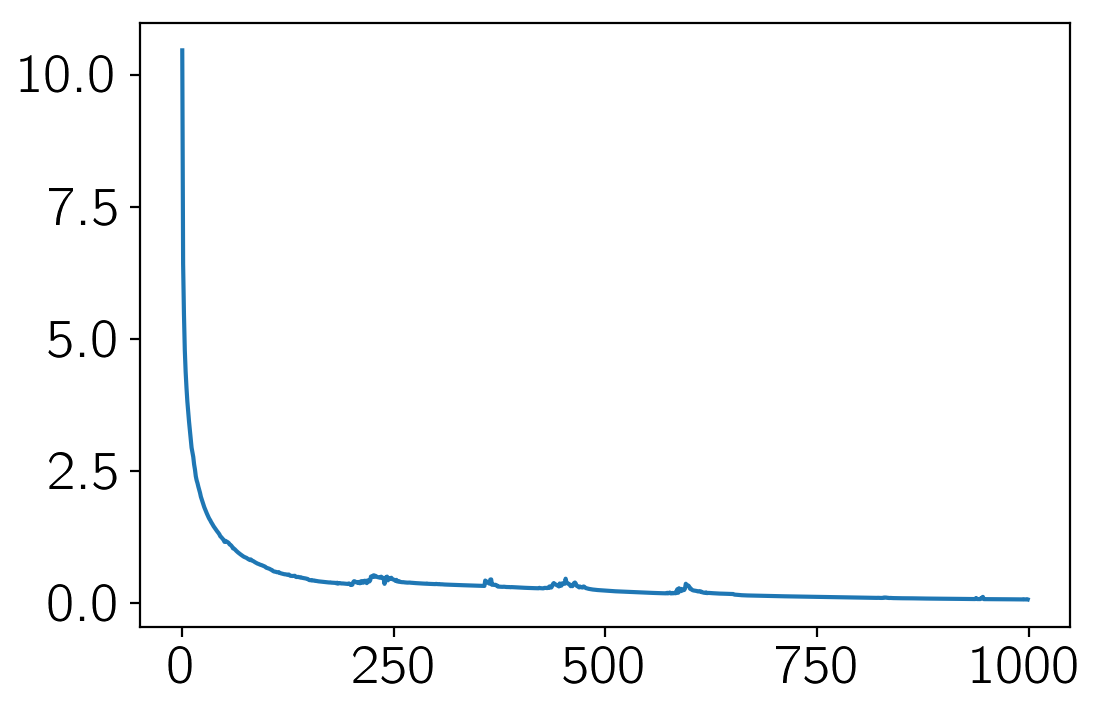

In [115]:
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')

In [116]:
pred = y[:K-1]
for i in range(10000):
    pred = np.append(pred, float(model.predict(pred[-(K-1):][None, None, :])))

(0, 11000)

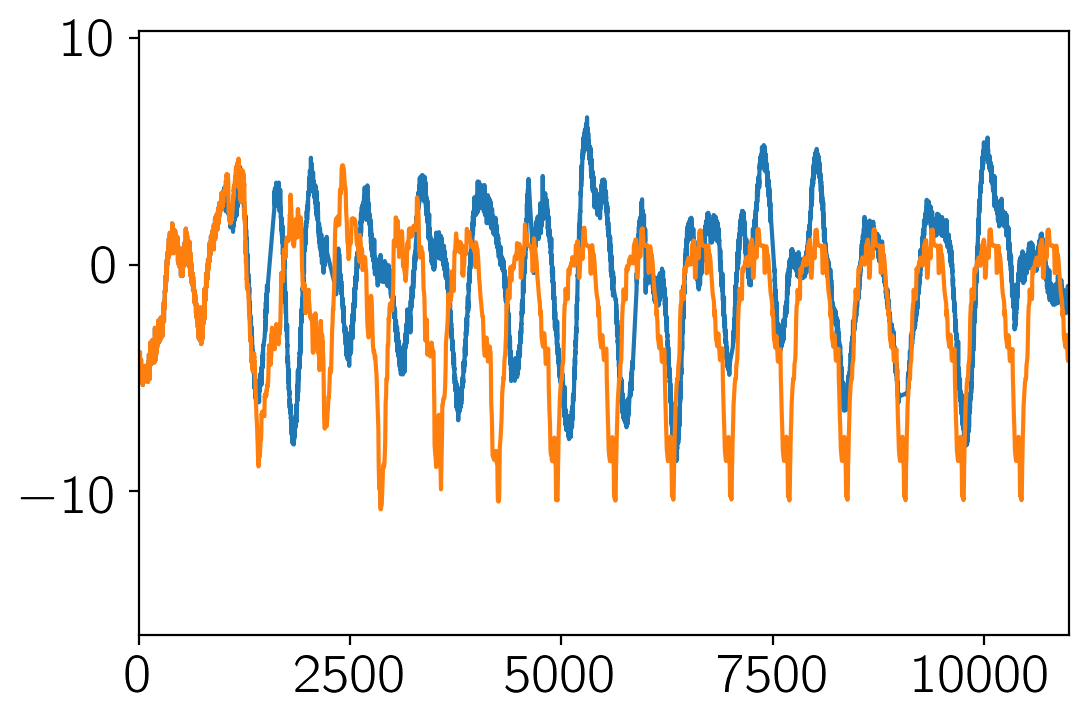

In [117]:
plt.plot(y)
plt.plot(pred)
plt.xlim(0, len(pred))
# plt.ylim(-20, 5)

In [79]:
batch_size = 40
n_data = len(y)
num_features = 1
lstm_size = 5

dataset = tf.placeholder(tf.float32, [None, num_features])
ivar_tensor = tf.placeholder(tf.float32, [None, num_features])
pred = tf.placeholder(tf.float32, [None, num_features])
lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size, reuse=True)

# Initial state of the LSTM memory.
hidden_state = tf.zeros([batch_size, lstm_size])
current_state = tf.zeros([batch_size, lstm_size])
state = hidden_state, current_state
loss = 0.0

W = tf.Variable(tf.ones((lstm_size, num_features)))
y_out = tf.Variable(tf.zeros(n_data))
preds = []
log_sigma2 = tf.Variable(tf.constant(0.0))

for i in range((n_data - 1) // batch_size):
    output, state = lstm(dataset[i*batch_size:(i+1)*batch_size], state)
    y_pred = tf.matmul(output, W)
    preds.append(y_pred)
    ivar_mod = ivar_tensor[i*batch_size:(i+1)*batch_size]
    loss += tf.reduce_sum(ivar_mod*(pred[i*batch_size:(i+1)*batch_size] - y_pred)**2)
    
for var in lstm.trainable_variables + [W]:
    loss += 1e-8*tf.reduce_sum(var**2)
    
for i in range(20):
    output, state = lstm(y_pred, state)
    y_pred = tf.matmul(output, W)
    preds.append(y_pred)

all_vars = [W] + lstm.trainable_variables
grad = tf.gradients(loss, all_vars)

opt = tf.train.AdamOptimizer().minimize(loss, var_list=all_vars)

init = tf.global_variables_initializer()

In [80]:
import tqdm

with tf.Session() as sess:
    sess.run(init)
    feed_dict = {dataset: y[:-1, None],
                 pred: y[1:, None],
                 ivar_tensor: ivar[1:, None]}
    loss_hist = []

    sess.run(init)
    for i in tqdm.trange(10000):
        sess.run(opt, feed_dict=feed_dict)
        loss_hist.append(sess.run(loss, feed_dict=feed_dict))
    
    result = sess.run(preds, feed_dict=feed_dict)

100%|██████████| 10000/10000 [04:03<00:00, 41.02it/s]


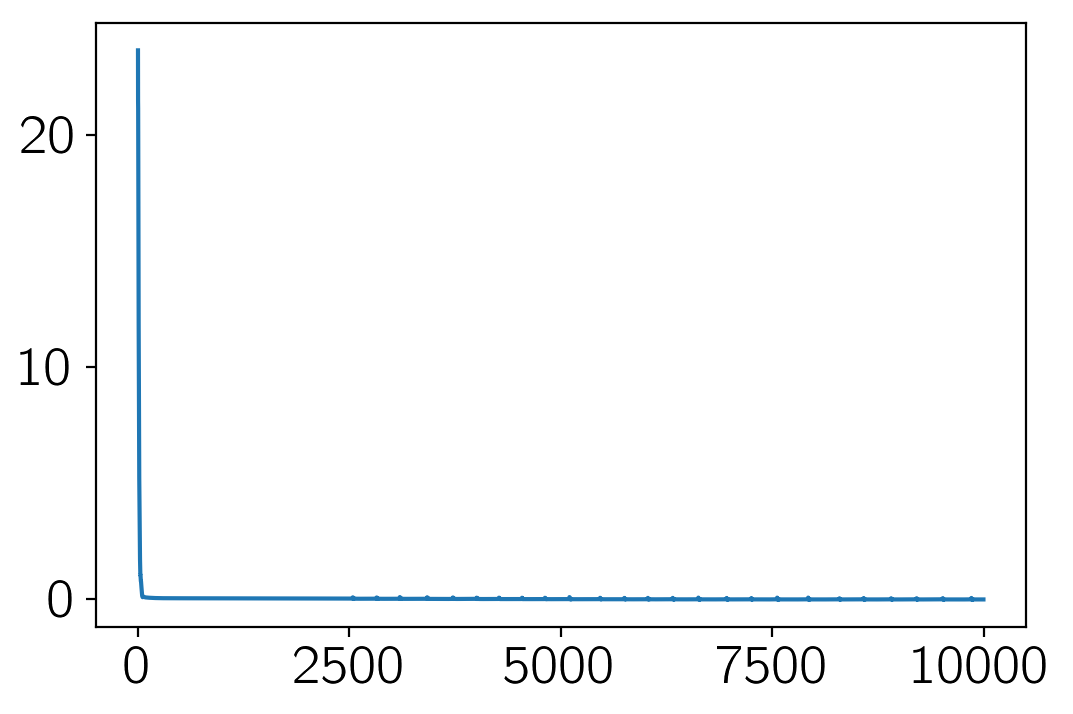

In [81]:
plt.plot(loss_hist)

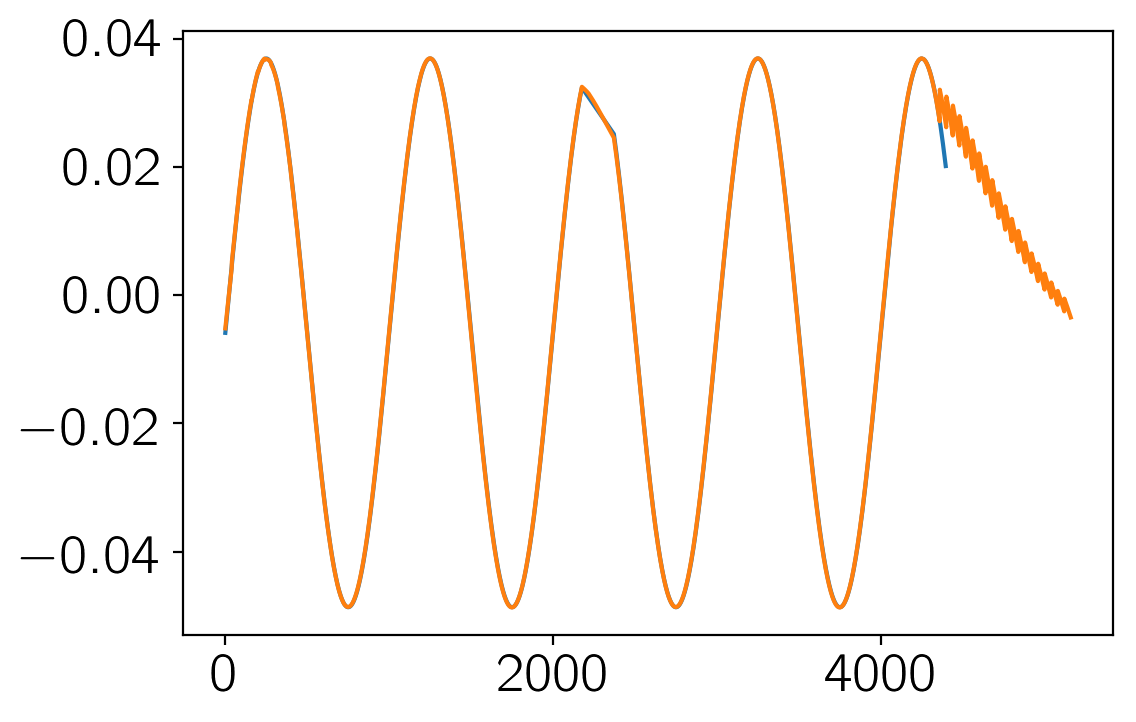

In [82]:
y_out = np.array(result).flatten()

plt.plot(y)
plt.plot(y_out)
# plt.xlim(0, 8000)

In [55]:
plt.plot(y[:len(y_out)]-y_out)

ValueError: operands could not be broadcast together with shapes (4397,) (84000,) 